In [32]:
import pandas as pd
from textblob import TextBlob
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
df = pd.read_csv('C6EYEj_sk-i_Comment_analis_1000.csv')

In [36]:
print(df.head())

                  id          username      owner_id  \
0  18021524144238599     _solijonov_s_  5.448343e+10   
1  17855759376186259  husniddin1993_08  5.825274e+10   
2  18074494588504596  _workaut_al1_oo9  6.035571e+10   
3  18082533211467554      abdumutal_uz  5.221165e+10   
4  17882140935066260            adi_o0  6.025756e+10   

                                     profile_pic_url  \
0  https://instagram.ftas2-1.fna.fbcdn.net/v/t51....   
1  https://instagram.ftas1-2.fna.fbcdn.net/v/t51....   
2  https://instagram.ftas1-1.fna.fbcdn.net/v/t51....   
3  https://instagram.ftas2-2.fna.fbcdn.net/v/t51....   
4  https://instagram.ftas1-2.fna.fbcdn.net/v/t51....   

                                                text    created_at  
0  Narxi qancha va oʻrganish muddati ogʻrib yubor...  1.717138e+09  
1             Onlayn kur utasa buladimi qancha tulov  1.717177e+09  
2                  Aka bu maktabni bitirb kiriladimi  1.717604e+09  
3            Qanday õrgansek bo'ladi va uyer qayer

In [38]:
def translate_to_english(text):
    try:
        translation = GoogleTranslator(source='auto', target='en').translate(text)
        return translation if translation else "Translation Error"
    except Exception as e:
        return "Translation Error"

In [40]:
df['Translated'] = df['text'].apply(translate_to_english)
print(df[['text', 'Translated']].head())

                                                text  \
0  Narxi qancha va oʻrganish muddati ogʻrib yubor...   
1             Onlayn kur utasa buladimi qancha tulov   
2                  Aka bu maktabni bitirb kiriladimi   
3            Qanday õrgansek bo'ladi va uyer qayerda   
4                                                  +   

                                         Translated  
0  How much it costs and how long it takes to learn  
1                    How much is the online course?  
2            Brother will graduate from this school  
3                            How to learn and where  
4                                 Translation Error  


In [41]:
def get_sentiment(text):
    if text == "Translation Error":
        return "Нейтральный"
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Позитивный'
    elif blob.sentiment.polarity < 0:
        return 'Негативный'
    else:
        return 'Нейтральный'

df['Sentiment'] = df['Translated'].apply(get_sentiment)
print(df[['Translated', 'Sentiment']].head())

                                         Translated    Sentiment
0  How much it costs and how long it takes to learn   Позитивный
1                    How much is the online course?   Позитивный
2            Brother will graduate from this school  Нейтральный
3                            How to learn and where  Нейтральный
4                                 Translation Error  Нейтральный


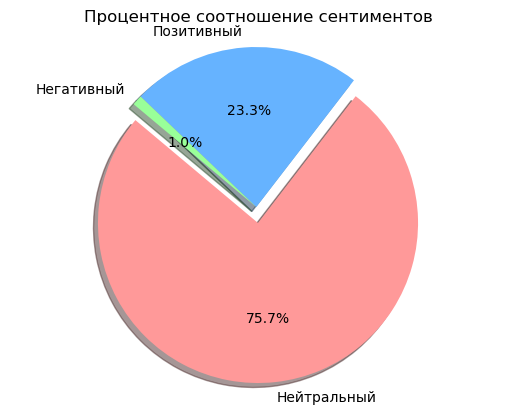

In [42]:
sentiment_counts = df['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Процентное соотношение сентиментов')
plt.show()
#    